##This Personal Project is designed to use openCV to find Waldo within an image. 

### It's just a simple programed designed to explore pattern matching.

Firstly, let's import all the relevant libraries.



In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Let's load in the puzzle image and display it.

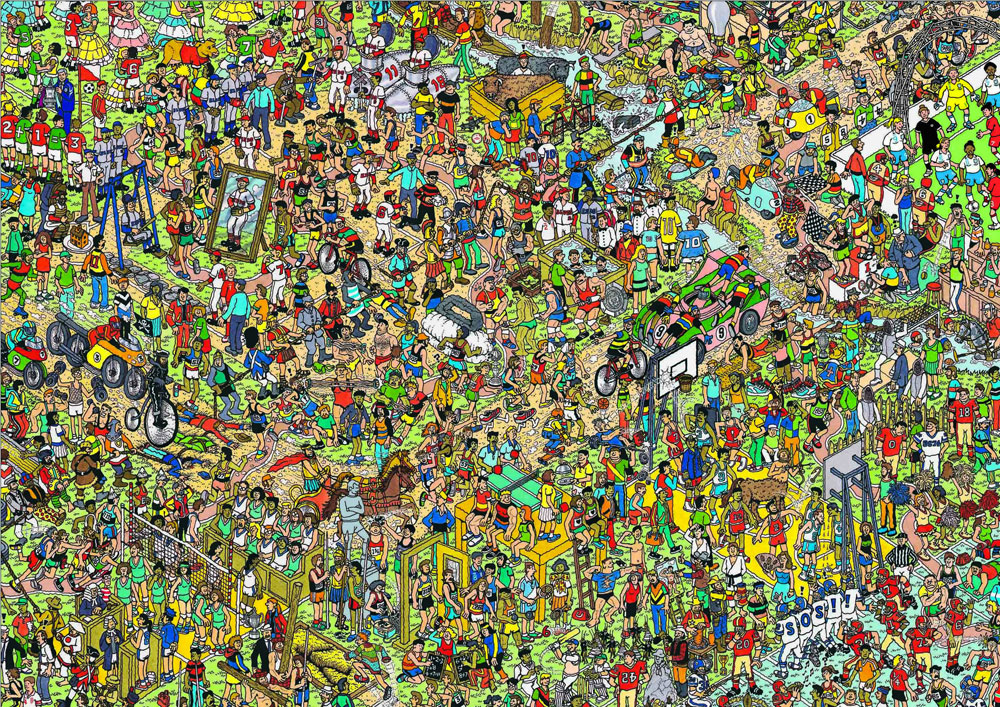

In [3]:
scene = cv2.imread("puzzle_1.jpg")
scene.shape
cv2_imshow(scene)

Now that the puzzle has been shown, let's also display Waldo. Additionally, let's print out the dimensions of him.


In [4]:
waldo = cv2.imread("query_1.jpg")
waldo.shape
cv2_imshow(waldo)

height, width, channel = waldo.shape
print("Height: ", height)
print("Width: ", width)
print("Channel: ",channel)

Height:  33
Width:  15
Channel:  3


Now, let's try using template matching to find Waldo.

Both the cv2.TM_COEFF and TM_CCORR will be used and compared.

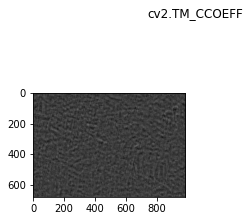

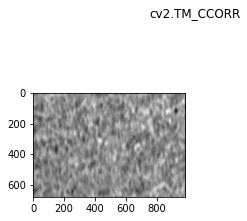

In [7]:
scene2 = scene.copy()

methodCOEF = cv2.TM_CCOEFF
methodCCORR = cv2.TM_CCORR

result_COEFF = cv2.matchTemplate(scene, waldo, methodCOEF)
min_val_COEF, max_val_COEFF, min_loc_COEFF, max_loc_COEFF = cv2.minMaxLoc(result_COEFF)  
top_left_COEFF = max_loc_COEFF  
bottom_right_COEFF = (top_left_COEFF[0] + width, top_left_COEFF[1] + height)

plt.subplot(121)
plt.imshow(result_COEFF, cmap='gray')
plt.suptitle("cv2.TM_CCOEFF")
plt.show()

result_CCORR = cv2.matchTemplate(scene2, waldo, methodCCORR)
min_val_CCORR, max_val_CCORR, min_loc_CCORR, max_loc_CCORR = cv2.minMaxLoc(result_CCORR)  
top_left_CCORR = max_loc_CCORR  
bottom_right_CCORR = (top_left_CCORR[0] + width, top_left_CCORR[1] + height)
plt.subplot(121)
plt.imshow(result_CCORR, cmap='gray')
plt.suptitle("cv2.TM_CCORR")
plt.show()

Now, let's find the highest score and print the location where it is located in the image.

In [8]:
if max_loc_COEFF > max_loc_CCORR:
  print("COEFF Scored Higher")
  print(max_loc_COEFF)
else:
  print("CCORR Scored Higher")
  print(max_loc_CCORR)

CCORR Scored Higher
(866, 125)


Finally, let's draw a rectangle on the scene where we think Waldo is!

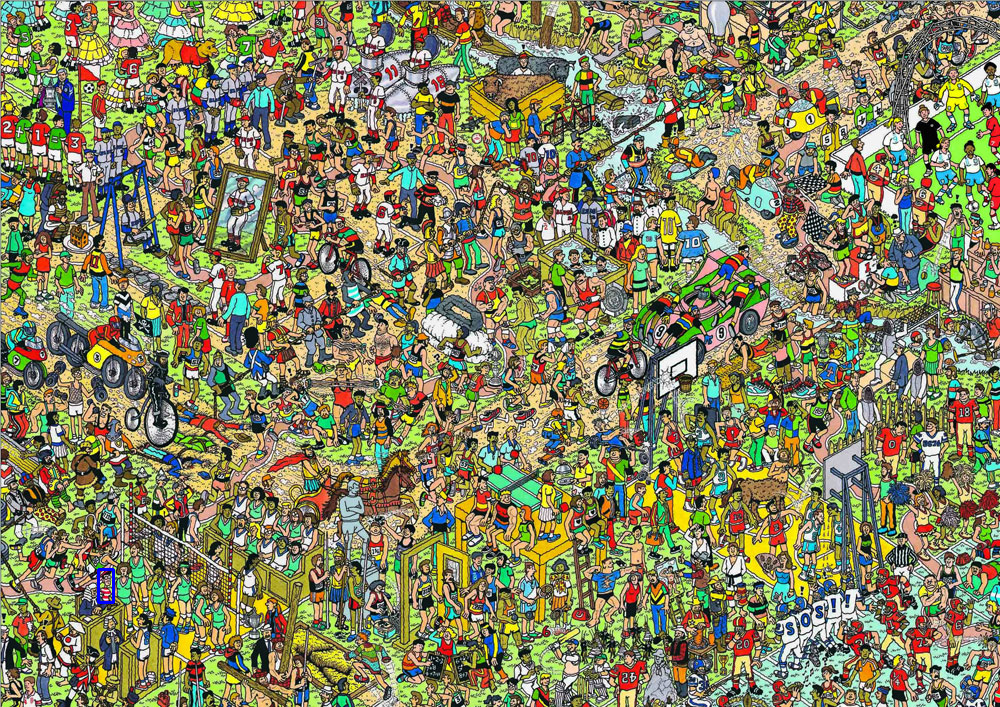

In [9]:
copied_image = scene.copy()
if max_loc_COEFF < max_loc_CCORR:
  cv2.rectangle(copied_image,top_left_COEFF, bottom_right_COEFF, 255, 2)
else:
  cv2.rectangle(copied_image,top_left_CCORR, bottom_right_CCORR, 255, 2)

cv2_imshow(copied_image)